<a href="https://colab.research.google.com/github/adrida/Forex-hourly-predictions---LTSM-Neural-Network/blob/main/deepleanrning_forex_hourly_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
files.upload()

Saving XAUUSD60streamlined.csv to XAUUSD60streamlined.csv


{'XAUUSD60streamlined.csv': b'Date,Open,High,Low,Close\r\n2012-06-22 07:00,1561.375,1566.751,1559.626,1564.796\r\n2012-06-22 08:00,1564.780,1569.378,1564.384,1569.232\r\n2012-06-22 09:00,1569.146,1572.376,1568.905,1570.179\r\n2012-06-22 10:00,1570.175,1571.013,1567.982,1568.203\r\n2012-06-22 11:00,1568.203,1570.953,1567.597,1570.657\r\n2012-06-22 12:00,1570.607,1570.983,1565.805,1566.383\r\n2012-06-22 13:00,1566.363,1569.185,1563.698,1568.033\r\n2012-06-22 14:00,1568.053,1569.252,1558.090,1561.746\r\n2012-06-22 15:00,1561.753,1564.741,1561.055,1563.823\r\n2012-06-22 16:00,1563.743,1567.814,1563.743,1566.387\r\n2012-06-22 17:00,1566.314,1568.701,1563.192,1568.276\r\n2012-06-22 18:00,1568.292,1570.071,1567.352,1569.433\r\n2012-06-22 19:00,1569.403,1573.352,1568.203,1572.712\r\n2012-06-22 20:00,1572.730,1572.953,1571.013,1572.365\r\n2012-06-24 22:00,1572.053,1573.252,1567.762,1568.015\r\n2012-06-24 23:00,1568.015,1569.802,1567.412,1569.563\r\n2012-06-25 00:00,1569.645,1576.552,1569.535,15

In [ ]:
raw_data = pd.read_csv('XAUUSD60streamlined.csv')
raw_data

,Date,Open,High,Low,Close
0,2012-06-22 07:00,1561.375,1566.751,1559.626,1564.796
1,2012-06-22 08:00,1564.780,1569.378,1564.384,1569.232
2,2012-06-22 09:00,1569.146,1572.376,1568.905,1570.179
3,2012-06-22 10:00,1570.175,1571.013,1567.982,1568.203
4,2012-06-22 11:00,1568.203,1570.953,1567.597,1570.657
...,...,...,...,...,...
49995,2020-11-09 09:00,1959.598,1961.085,1958.138,1958.558
49996,2020-11-09 10:00,1958.458,1960.318,1957.495,1958.725
49997,2020-11-09 11:00,1958.725,1958.725,1934.538,1938.078
49998,2020-11-09 12:00,1938.108,1938.878,1901.045,1911.468


In [ ]:
raw_data.shape

(50000, 5)

In [204]:
tail_raw = raw_data.tail(168)
tail_raw = tail_raw[['Open','High', 'Low', 'Close']]

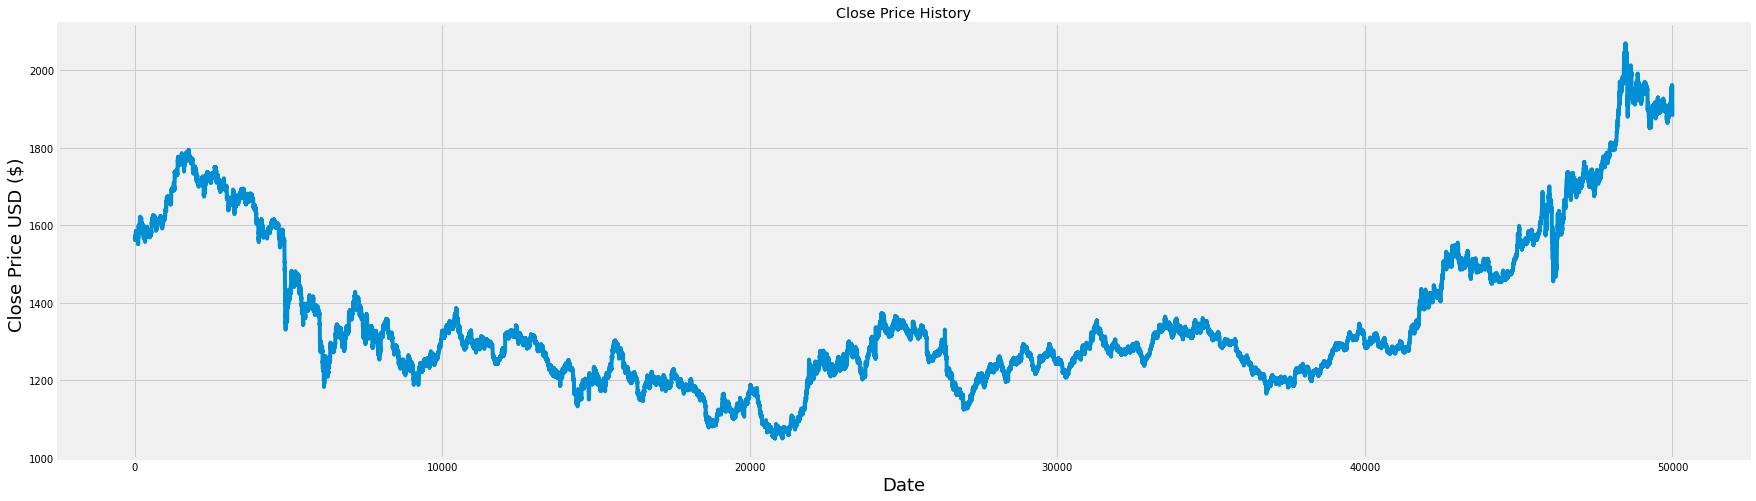

In [ ]:
plt.figure(figsize=(27,8))
plt.title('Close Price History')
plt.plot(raw_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($) ',  fontsize=18)
plt.show()

In [ ]:
data_all = raw_data.filter(['Open','High','Low','Close']).values
data_test = raw_data.filter(['Open','High','Low','Close'])
data_close = raw_data.filter(['Close']).values
data_all

array([[1561.375, 1566.751, 1559.626, 1564.796],
       [1564.78 , 1569.378, 1564.384, 1569.232],
       [1569.146, 1572.376, 1568.905, 1570.179],
       ...,
       [1958.725, 1958.725, 1934.538, 1938.078],
       [1938.108, 1938.878, 1901.045, 1911.468],
       [1911.415, 1911.548, 1868.448, 1880.518]])

In [ ]:
data_all

array([['2012-06-22 07:00', 1561.375, 1566.751, 1559.626, 1564.796],
       ['2012-06-22 08:00', 1564.78, 1569.378, 1564.384,
        1569.2320000000002],
       ['2012-06-22 09:00', 1569.146, 1572.376, 1568.905,
        1570.1789999999999],
       ...,
       ['2020-11-09 11:00', 1958.725, 1958.725, 1934.5379999999998,
        1938.078],
       ['2020-11-09 12:00', 1938.108, 1938.878, 1901.045,
        1911.4679999999998],
       ['2020-11-09 13:00', 1911.415, 1911.5479999999998,
        1868.4479999999999, 1880.5179999999998]], dtype=object)

In [ ]:
len_training = math.ceil(len(data_close) * 0.8)
len_training

40000

In [171]:
unscaled_train_data = data_all[0:len_training, :]
training_scaler = MinMaxScaler(feature_range=(0,1))
train_data = training_scaler.fit_transform(unscaled_train_data)
x_train = []
y_train = []

for i in range(168, len(train_data)):
  x_train.append(train_data[i-168:i])
  y_train.append(train_data[i,3])
  if i <= 168:
    print(x_train)
    print(y_train)
    print()



[array([[0.68620339, 0.69258215, 0.68598186, 0.69083575],
       [0.69077256, 0.69610718, 0.69233935, 0.69678877],
       [0.69663129, 0.70013002, 0.69838016, 0.69805963],
       [0.69801211, 0.69830109, 0.69714688, 0.69540788],
       [0.69536588, 0.69822058, 0.69663246, 0.6987011 ],
       [0.69859181, 0.69826084, 0.69423804, 0.69296547],
       [0.69289679, 0.6958482 , 0.69142274, 0.69517974],
       [0.6951646 , 0.6959381 , 0.68392951, 0.6867427 ],
       [0.68671063, 0.68988504, 0.68789125, 0.68953   ],
       [0.68938101, 0.69400853, 0.69148287, 0.69297084],
       [0.69283103, 0.69519875, 0.69074664, 0.69550584],
       [0.69548531, 0.69703707, 0.6963051 , 0.69705851],
       [0.69697616, 0.70143966, 0.69744217, 0.70145887],
       [0.70144066, 0.70090427, 0.70119681, 0.7009932 ],
       [0.7005322 , 0.70130548, 0.69685292, 0.69515558],
       [0.69511361, 0.69667612, 0.69638527, 0.69723297],
       [0.6973009 , 0.70573357, 0.69922195, 0.70131125],
       [0.70130111, 0.70418508

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(39832, 168, 4)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

39832/39832 [==============================] - 2344s 59ms/step - loss: 1.6205e-04


In [ ]:
unscaled_test_data = data_all[len_training - 168:, :]
tmpdata = data_all[len_training - 168:, :]
testing_scaler = MinMaxScaler(feature_range=(0,1))
autre_scaler = MinMaxScaler(feature_range=(0,1))
test_data = testing_scaler.fit_transform(unscaled_test_data)
tmpdata = tmpdata[:,3]
tmpdata = np.reshape(tmpdata, (tmpdata.shape[0], 1))
#print(np.reshape(tmpdata, (tmpdata.shape[0], 1)))
temp = autre_scaler.fit_transform(tmpdata)

x_test = []
y_test = data_close[len_training:, :]
for i in range(168, len(test_data)):
  x_test.append(test_data[i-168:i])
  #if i <= 169:
    #print(x_test)
print(temp)


[[0.09091215]
 [0.09066294]
 [0.08699082]
 ...
 [0.83545848]
 [0.80230096]
 [0.76373557]]


In [ ]:

x_test = np.array(x_test)
x_test

In [ ]:
x_test.shape

(10000, 168, 4)

In [ ]:
predictions = model.predict(x_test)
predictions = autre_scaler.inverse_transform(predictions)

In [ ]:
predictions.shape

(10000, 1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test

array([[1294.475],
       [1291.235],
       [1287.395],
       ...,
       [1938.078],
       [1911.468],
       [1880.518]])

In [169]:
predictions

array([[1285.831 ],
       [1285.5587],
       [1282.9983],
       ...,
       [1953.3088],
       [1937.3239],
       [1913.7333]], dtype=float32)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
predictions.reshape((-1,1)).shape

(10000, 1)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.9736080306640114

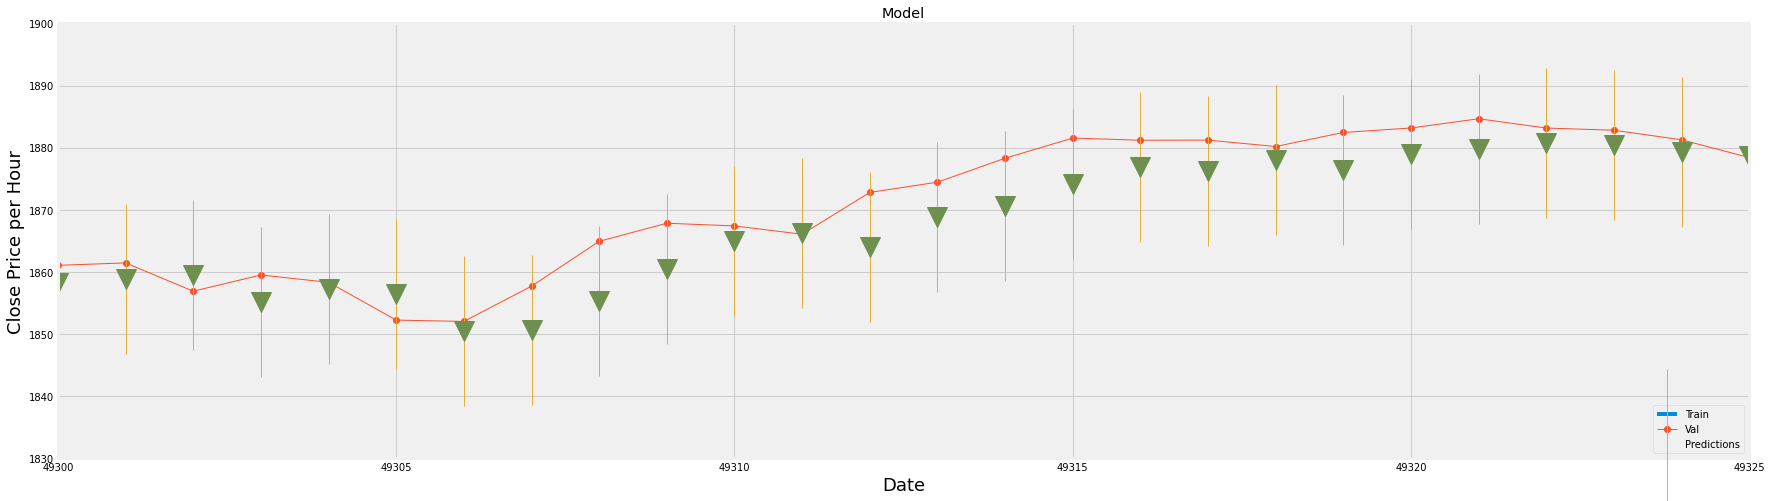

In [199]:
train = raw_data[:len_training]
dataplt = {'Predictions':predictions.flatten(), 'Close':raw_data[len_training:]["Close"]}
valid = pd.DataFrame(data=dataplt)
#valid = np.array(data_close[len_training:])
#valid['Predictions'] = predictions.flatten()
plt.figure(figsize=(27,8))
plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price per Hour', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']], marker='o', markersize=6, linewidth=1)
plt.plot(valid[['Predictions']], marker='|', markersize=150, linewidth= 0)
plt.plot(valid[['Predictions']], marker='v', markersize=20, linewidth= 0)
plt.xlim(49300,49325)
plt.ylim(1830,1900)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [206]:
tail_raw
X_pred = []
scaled_tail = testing_scaler.transform(tail_raw)
X_pred.append(scaled_tail)
X_pred = np.array(X_pred)
pred_price = model.predict(X_pred)
pred_price


array([[0.7697577]], dtype=float32)

In [208]:
pred_price = autre_scaler.inverse_transform(pred_price)

In [209]:
pred_price

array([[1885.351]], dtype=float32)

In [210]:
valid

,Predictions,Close
40000,1285.831055,1294.475
40001,1285.558716,1291.235
40002,1282.998291,1287.395
40003,1278.818237,1287.935
40004,1278.642822,1287.035
...,...,...
49995,1954.283325,1958.558
49996,1952.653687,1958.725
49997,1953.308838,1938.078
49998,1937.323853,1911.468
